In [1]:
import pandas as pd
import seaborn as sns

In [2]:
p_df = sns.load_dataset("penguins")

In [3]:
p_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [4]:
p_df.island.unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

#### drooping nas

In [5]:
p_df = p_df.dropna()

#### dropping duplicates 

In [6]:
p_df = p_df.drop_duplicates()

### X-y split

In [7]:
X = p_df[["flipper_length_mm","bill_depth_mm"]]
y = p_df[["body_mass_g"]]

### Train-test split

In [8]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 105)

## Scaling

In [88]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler= StandardScaler
scaler_fitted =scaler.fit()
X_train_scaled=scaler_fitted.transform()

### Model training

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
lm = LinearRegression()
model = lm.fit(X_train,y_train)

In [52]:
model.coef_

array([[51.53303872,  9.75909987]])

In [53]:
model.intercept_

array([-6328.27433718])

### Predict mass of random penguin

In [54]:
random_penguin = X_test.sample()

In [55]:
random_penguin

,flipper_length_mm,bill_depth_mm
12,182.0,17.6


In [56]:
model.predict(random_penguin)

array([[3222.49886768]])

### Create predictions for test set

In [57]:
y_pred = model.predict(X_test)

In [58]:
y_pred = pd.DataFrame(y_pred)

In [59]:
y_test = y_test.reset_index(drop=True)

In [60]:
resiudals_df = pd.concat([y_test,y_pred],axis=1)

In [61]:
residuals_df = residuals_df.rename(columns={"body_mass_g":"y_test", 0:"y_pred"})

In [62]:
residuals_df["residual"] = residuals_df["y_test"]-residuals_df["y_pred"]

In [63]:
residuals_df.head()

,y_test,y_pred,residual
0,3250.0,3001.901576,248.098424
1,4875.0,5271.325621,-396.325621
2,4000.0,3920.819556,79.180444
3,3675.0,4053.835184,-378.835184
4,4050.0,3752.411909,297.588091


### Calculating metrics

In [64]:
mean_error = residuals_df["residual"].mean()

In [65]:
mean_error

0.4256712769165244

In [66]:
from sklearn.metrics import mean_squared_error as mse , mean_absolute_error as mae

In [67]:
mse(y_test,y_pred)

168814.01358079925

In [68]:
mae(y_test,y_pred)

330.3598204973078

In [69]:
rmse = mse(y_test,y_pred, squared = False)


## Computing R2_score for train_set

In [70]:
from sklearn.metrics import r2_score

In [71]:
round(r2_score(y_test, y_pred),2)

0.73

## Computing R2_score for train_set

In [72]:
y_pred_train = pd.DataFrame(model.predict(X_train))
#y_pred_train

In [73]:
round(r2_score(y_train, y_pred_train),2)

0.77

In [81]:
feature_names = list(X_train.columns)

In [82]:
#feature importance(meaning the importance of the coeficients of variables) dataframe:

coefficients = model.coef_

In [83]:
coefficients = [i for i in coefficients[0]]

In [85]:
#fi_dict = dict(zip(feature_names, coefficients))
fi = {"name": feature_names, "coeff": coefficients}
fi_df = pd.DataFrame(fi)

fi_df

,name,coeff
0,flipper_length_mm,51.533039
1,bill_depth_mm,9.759100


<AxesSubplot:xlabel='name', ylabel='coeff'>

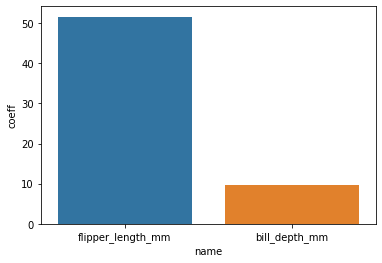

In [86]:
sns.barplot(x = fi_df["name"], y =fi_df["coeff"])